## Feed Forward

In [28]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size=784 #28*28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.001


In [13]:
# MINST
# root is where the data will be stored
# transform is how the data will be transformed --> that converts a PIL Image or numpy array into a PyTorch tensor.
# download=True will download the data if you don't have it
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

torch.Size([100, 1, 28, 28]) torch.Size([100])


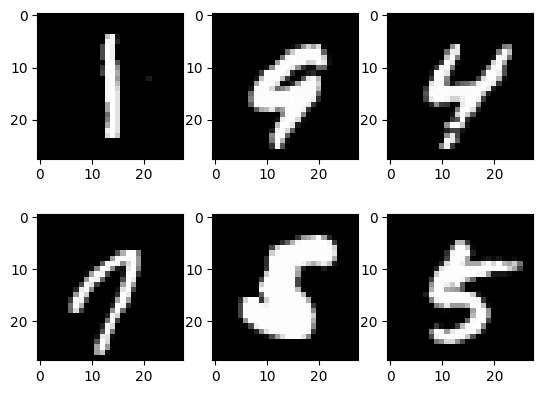

In [25]:
examples=iter(train_loader)
# Accessing 1 batch
samples,labels=examples.__next__()
print(samples.shape,labels.shape)

# Show Sample (1st batch)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [39]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()

        # output=x*wT+bias [Linear function]
        self.l1=nn.Linear(input_size,hidden_size)

        # Activation Function
        self.relu=nn.ReLU()

        self.l2 = nn.Linear(hidden_size,num_classes)

        # Activation Function (Sigmoid) bec classification Problem but we will use cross entropy 
        # that apply that function inside it so we won't define that layer
    
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    
model= NeuralNet(input_size,hidden_size,num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss() # Apply Sigmoid inside it :D
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


# Training
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    for i , (images,labels) in enumerate(train_loader):
        # Images are 100*1*28*28
        # Reshape to 100*784
        images=images.reshape(-1,28*28).to(device) # [100,784]
        labels=labels.to(device) # [100]
  
        # Forward
        outputs=model(images)
        loss=criterion(outputs,labels)

        # Backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps} , loss = {loss.item()} ')


epoch 1/2, step 100/600 , loss = 0.48600172996520996 
epoch 1/2, step 200/600 , loss = 0.3482045829296112 
epoch 1/2, step 300/600 , loss = 0.3221309185028076 
epoch 1/2, step 400/600 , loss = 0.24100519716739655 
epoch 1/2, step 500/600 , loss = 0.18110185861587524 
epoch 1/2, step 600/600 , loss = 0.24509309232234955 
epoch 2/2, step 100/600 , loss = 0.22404764592647552 
epoch 2/2, step 200/600 , loss = 0.22133058309555054 
epoch 2/2, step 300/600 , loss = 0.27536407113075256 
epoch 2/2, step 400/600 , loss = 0.3860691487789154 
epoch 2/2, step 500/600 , loss = 0.09852485358715057 
epoch 2/2, step 600/600 , loss = 0.11960834264755249 


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()

        # output=x*wT+bias [Linear function]
        self.l1=nn.Linear(input_size,hidden_size)

        # Activation Function
        self.relu=nn.ReLU()

        self.l2 = nn.Linear(hidden_size,num_classes)

        # Activation Function (Sigmoid) bec classification Problem but we will use cross entropy 
        # that apply that function inside it so we won't define that layer
    
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    
model= NeuralNet(input_size,hidden_size,num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss() # Apply Sigmoid inside it :D
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


# Training
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    for i , (images,labels) in enumerate(train_loader):
        # Images are 100*1*28*28
        # Reshape to 100*784
        images=images.reshape(-1,28*28).to(device) # [100,784]
        labels=labels.to(device) # [100]
  
        # Forward
        outputs=model(images)
        loss=criterion(outputs,labels)

        # Backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps} , loss = {loss.item()} ')


epoch 1/2, step 100/600 , loss = 0.48600172996520996 
epoch 1/2, step 200/600 , loss = 0.3482045829296112 
epoch 1/2, step 300/600 , loss = 0.3221309185028076 
epoch 1/2, step 400/600 , loss = 0.24100519716739655 
epoch 1/2, step 500/600 , loss = 0.18110185861587524 
epoch 1/2, step 600/600 , loss = 0.24509309232234955 
epoch 2/2, step 100/600 , loss = 0.22404764592647552 
epoch 2/2, step 200/600 , loss = 0.22133058309555054 
epoch 2/2, step 300/600 , loss = 0.27536407113075256 
epoch 2/2, step 400/600 , loss = 0.3860691487789154 
epoch 2/2, step 500/600 , loss = 0.09852485358715057 
epoch 2/2, step 600/600 , loss = 0.11960834264755249 


In [45]:

# Testing
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)

        outputs=model(images)

        # print(outputs.shape) #torch.Size([100, 10])
        # value,prediction
        _,predictions=torch.max(outputs,1) #on dim 1 which is the 10 classes
        
        n_samples+=labels.shape[0]
        n_correct+=(predictions==labels).sum().item() #.item() bec it is tensor he want value
    acc =100.0* n_correct/n_samples
    print(f'accuracy = {acc}')

accuracy = 95.53
